<div style="border:solid steelblue 1px; padding: 20px">
    
<font size="4"><p style="text-align:center"><b>Рекомендация тарифов 📞</b></p></font>

</div>

<div class="alert alert-info">
<font size="4", color = "black">📌 В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Построим модель с максимально большим значением accuracy. 

# Содержание
1. [Описание данных](#Описание_данных)
2. [Изучение общей информации](#Изучение_общей_информации)
3. [Разобьем данные на выборки](#Разобьем_данные_на_выборки)
4. [Исследование_моделей](#Исследование_моделей) 
4. [Проверка модели на адекватность](#Проверка_модели_на_адекватность) 
4. [Тестирование модели](#Тестирование_модели) 
5. [Вывод](#Вывод)

<div class="alert alert-info">
<font size="4", color = "black"><a name="Описание_данных"><h3>Описание данных</h3></a></font>
    <br /> 
    <font size="3", color = "black">
        

<ul>
 <li>сalls — количество звонков,</li>
 <li>minutes — суммарная длительность звонков в минутах,</li>
 <li>messages — количество sms-сообщений,</li>
 <li>mb_used — израсходованный интернет-трафик в Мб,</li>
 <li>is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).</li>
</ul>

<div class="alert alert-info">
<font size="4", color = "black"><a name="Изучение_общей_информации"><h3>Изучение общей информации</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [96]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [97]:
pth1 = '/datasets/users_behavior.csv'
pth2 = 'users_behavior.csv'


if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
   print('Something is wrong')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div class="alert alert-info">
    <font size="3", color = "black">
В данных пропусков не обнаружено.

In [99]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [100]:
df.duplicated().sum()

0

<div class="alert alert-info">
    <font size="3", color = "black">
В данных дубликатов не обнаружено.

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Вывод</b></font>
    <br /> 
    <font size="3", color = "black">
<br />В данных пропусков и дубликатов не обнаружено.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Разобьем_данные_на_выборки"><h3>Разобьем данные на выборки</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [101]:
X = df.drop(['is_ultra'], axis=1)
X


,calls,minutes,messages,mb_used
0,40.0,311.90,83.0,19915.42
1,85.0,516.75,56.0,22696.96
2,77.0,467.66,86.0,21060.45
3,106.0,745.53,81.0,8437.39
4,66.0,418.74,1.0,14502.75
...,...,...,...,...
3209,122.0,910.98,20.0,35124.90
3210,25.0,190.36,0.0,3275.61
3211,97.0,634.44,70.0,13974.06
3212,64.0,462.32,90.0,31239.78


In [102]:
y = df['is_ultra']
y

0       0
1       0
2       0
3       1
4       0
       ..
3209    1
3210    0
3211    0
3212    0
3213    1
Name: is_ultra, Length: 3214, dtype: int64

In [103]:
X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y, 
                                                        train_size=0.4, 
                                                        random_state=42,
                                                        stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_1, y_test_1, 
                                                    train_size=0.5, 
                                                    random_state=42,
                                                    stratify=y_test_1)
print(X_test.shape)
print(X_valid.shape)
print(X_train.shape)

(964, 4)
(965, 4)
(1285, 4)


<div class="alert alert-info">
<font size="4", color = "black"><a name="Исследование_моделей"><h3>Исследование моделей</h3></a></font>
    <br /> 
    <font size="3", color = "black">

 <div class="alert alert-info">
    <font size="3", color = "black">
Рассмотрим алгоритм классификации — RandomForestClassifier 

In [104]:
from tqdm import tqdm
# Оценивание эффективности выполнения алгоритма случайного леса
best_model_rf = None
accuracy_RandomForest = 0
best_est = 0
best_depth = 0
for est in tqdm(range(10, 51, 10)):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(X_train, y_train)
        result_rf = model.score(X_valid, y_valid) 
        if result_rf > accuracy_RandomForest:
            best_model_rf = model
            accuracy_RandomForest = result_rf
            best_est = est
            best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", accuracy_RandomForest, '\n'
      "Количество деревьев:", best_est,'\n' "Максимальная глубина:", best_depth)

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

Accuracy наилучшей модели на валидационной выборке: 0.8062176165803109 
Количество деревьев: 20 
Максимальная глубина: 8


 <div class="alert alert-info">
    <font size="3", color = "black">
Рассмотрим алгоритм классификации — LogisticRegression

In [105]:
# Оценивание эффективности выполнения алгоритма логистической регрессии
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)# Напишите код здесь
model.fit(X_train, y_train)
accuracy_LogisticRegression = model.score(X_valid, y_valid)
print("Accuracy модели на валидационной выборке:", accuracy_LogisticRegression)

Accuracy модели на валидационной выборке: 0.6994818652849741


 <div class="alert alert-info">
    <font size="3", color = "black">
Рассмотрим алгоритм классификации — DecisionTreeClassifier

Accuracy лучшей модели: 0.794818652849741 
Максимальная глубина: 4


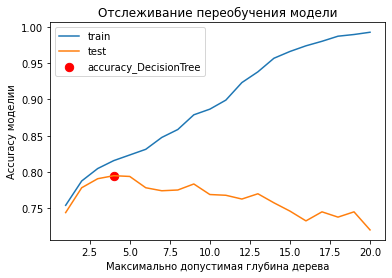

In [106]:
# Оценивание эффективности выполнения алгоритма дерева решений
best_model_dt = None
accuracy_DecisionTree = 0
best_depths = 0
s = []
s_train = []
dep = []
for depths in range (1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depths) # обучите модель с заданной глубиной дерева
    model.fit(X_train, y_train) # обучите модель
    predictions = model.predict(X_valid) # получите предсказания модели
    result_train_dt = model.score(X_train, y_train) # посчитайте качество модели
    result_dt = model.score(X_valid, y_valid) # посчитайте качество модели
    dep.append(depths)
    s.append(result_dt)
    s_train.append(result_train_dt)
    if depths == 20:
        plt.plot(dep, s_train, label='train')
        plt.plot(dep, s, label='test')
        plt.title('Отслеживание переобучения модели')
        plt.xlabel('Максимально допустимая глубина дерева')
        plt.ylabel('Accuracy моделии')
        plt.scatter(best_depths, accuracy_DecisionTree, color='red', s=70, marker='o', label='accuracy_DecisionTree' )
        plt.legend()
    if result_dt > accuracy_DecisionTree:
        best_model_dt = model
        accuracy_DecisionTree = result_dt
        best_depths = depths
        #plt.scatter(best_depths, accuracy_DecisionTree, color='red', s=70, marker='x', label='not statistically significant' )
        #s.append(result)
print("Accuracy лучшей модели:",accuracy_DecisionTree, '\n'"Максимальная глубина:", best_depths)

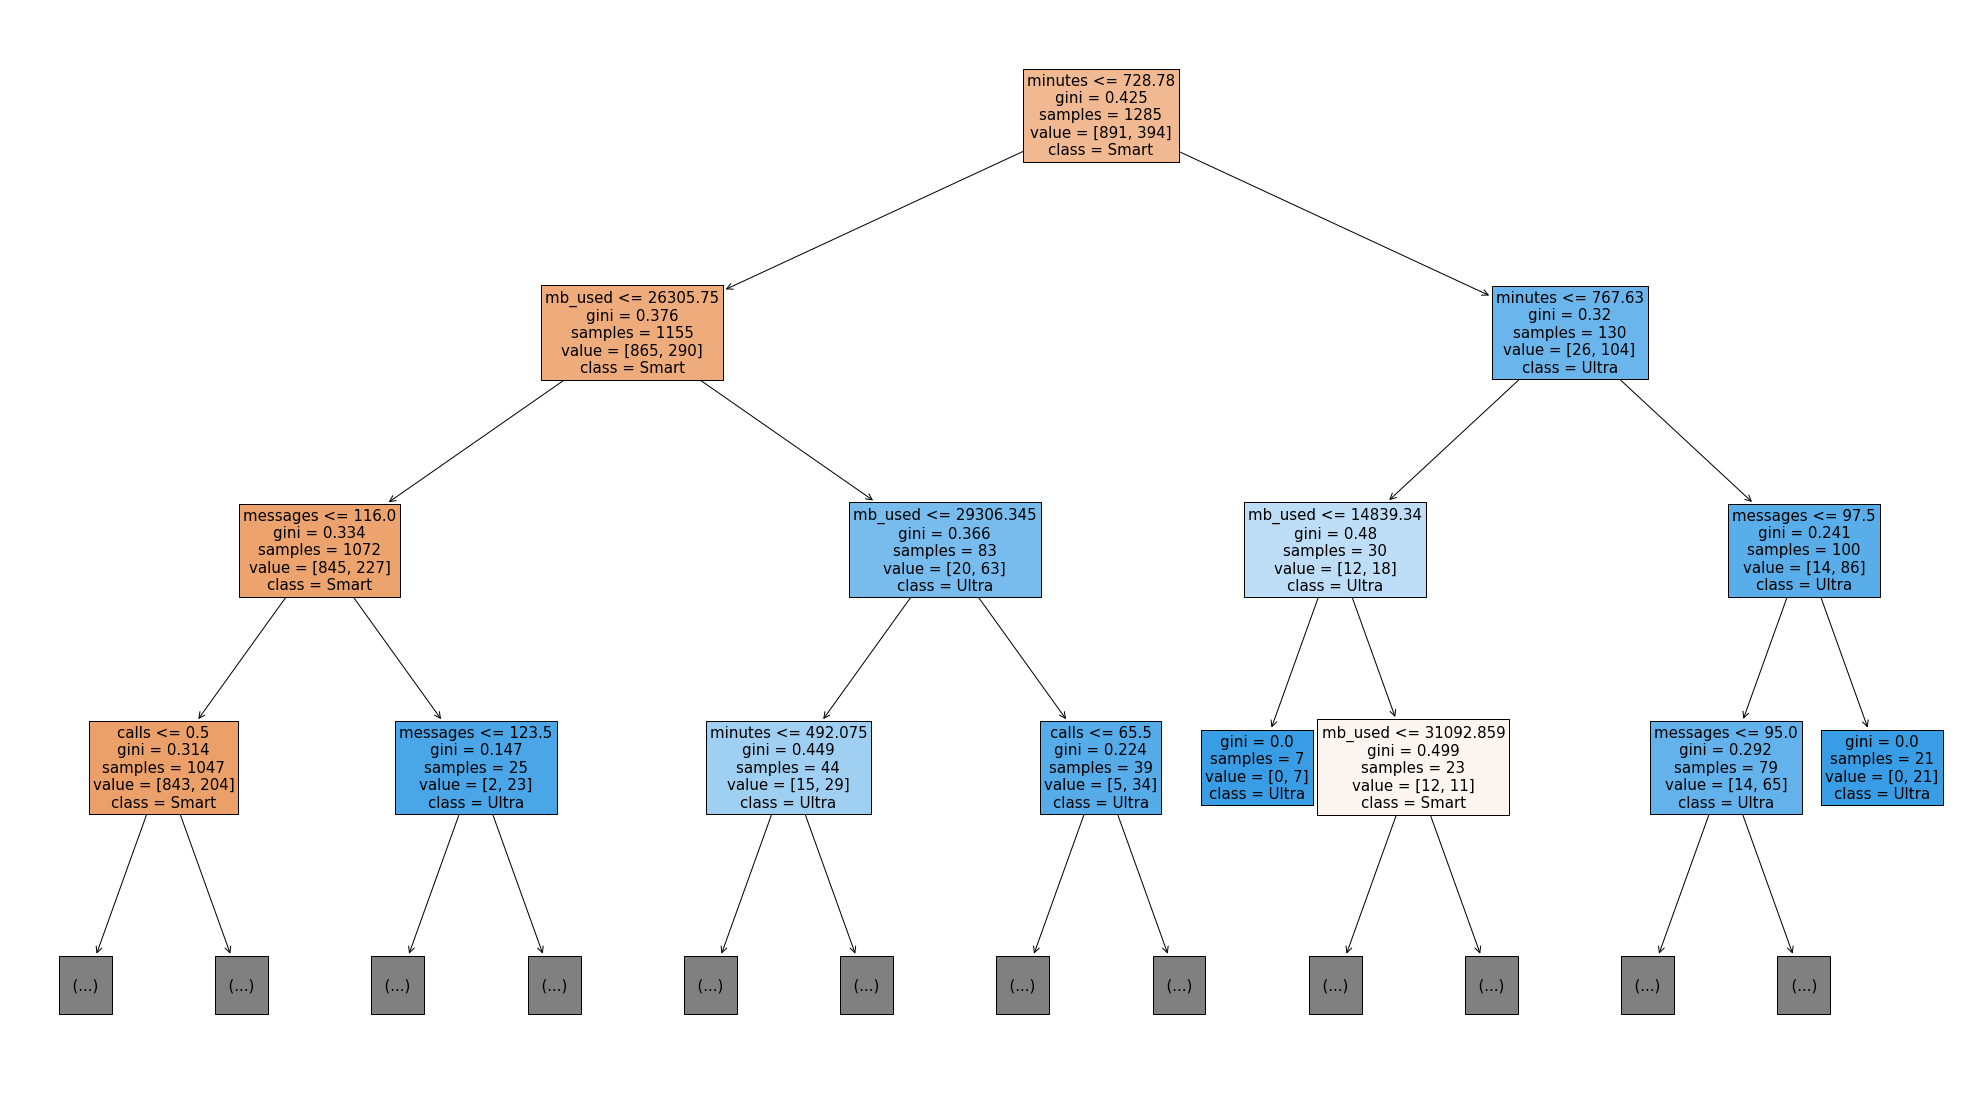

In [107]:
#строим tree_plot
model = DecisionTreeClassifier(random_state=12345, max_depth=4) # обучите модель с заданной глубиной дерева
best_model_tree = model.fit(X_train, y_train) # обучите модель
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35,20))
tree.plot_tree(best_model_tree, 
               feature_names=X.columns.values, 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15,
               max_depth = 3);

 <div class="alert alert-info">
    <font size="3", color = "black">
Построим гистограмму по оценке моделей по accuracy

In [108]:
name_model = ['Random''\n''Forest''\n''Classifier','Logistic''\n''Regression','Decision''\n''Tree''\n''Classifier']
estimation_accuracy = [accuracy_RandomForest, accuracy_LogisticRegression, accuracy_DecisionTree]

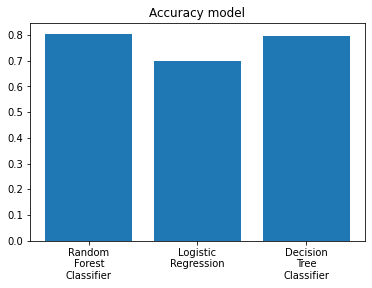

In [109]:
plt.bar(x=name_model, height=estimation_accuracy)
plt.title("Accuracy model");

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Комментарий студента</b></font>
  <br><font size="3", color = "black">
    <br>
Из графика видно, что высокое качество работы у модели, обученной на классификаторе RandomForestClassifier. 

<div class="alert alert-info">
<font size="4", color = "black"><a name="Проверка_модели_на_адекватность"><h3>Проверка модели на адекватность</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [110]:
#проверка на адекватность модели
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)
print('accuracy_score константой модели:', dummy_clf.score(X_test, y_test))
print('accuracy_score финальной модели:', accuracy_RandomForest)

accuracy_score константой модели: 0.6939834024896265
accuracy_score финальной модели: 0.8062176165803109


<div class="alert alert-info">
<font size="4", color = "black"><a name="Тестирование_модели"><h3>Тестирование модели</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [111]:
#для финальной проверки случайного леса применяем тестовую выборку с конкретными гиперпараметрами
model = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth) 
model.fit(X_train, y_train)
predictions = model.predict(X_test)
final_result = model.score(X_test, y_test)
print("Accuracy наилучшей модели на тестовой выборке:", final_result)

Accuracy наилучшей модели на тестовой выборке: 0.8091286307053942


In [112]:
X_train_plus_model = pd.concat([X_train, X_valid])
y_train_plus_model = pd.concat([y_train, y_valid])
print(X_train_plus_model.shape)
print(y_train_plus_model.shape)
print(X_test.shape)
print(y_test.shape)

(2250, 4)
(2250,)
(964, 4)
(964,)


In [113]:
model_train_plus_model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=8) 
model_train_plus_model.fit(X_train_plus_model, y_train_plus_model)
accuracy_train_plus_model = model.score(X_test, y_test) 

In [114]:
if accuracy_train_plus_model == final_result:
    print('После объединения тренировочной и валидационной выборки точность не изменилась.')
elif accuracy_train_plus_model > final_result:
    print('После объединения тренировочной и валидационной выборки точность улучшилась.')
else:
    print('После объединения тренировочной и валидационной выборки точность уменьшилась.')

После объединения тренировочной и валидационной выборки точность не изменилась.


<div class="alert alert-info">
<font size="4", color = "black"><a name="Вывод"><h3>Вывод</h3></a></font>
    <br /> 
    <font size="3", color = "black">

 <div class="alert alert-info">
    <font size="3", color = "black">
Было проведено исследование, чтобы построить модель для задачи классификации с максимально большим значением accuracy, которая выберет подходящий тариф. Входные данные - данные о поведении клиентов, которые уже перешли на эти тарифы. Были обучены модели логистической регрессии, дерева решений и случайного леса. 
        <br><b>Какая модель лучше?</b>
<br>У каждой — свои достоинства и недостатки. 
<br>У алгоритма классификации - случайный лес, высокое качество (accuracy), но медленная скорость.
<br>У дерева решений, качество (accuracy) ниже, чем у случайного леса, но высокая скорость работы.
<br>У логистической регресии самое низкое качество (accuracy), но высокая скорость работы.
<br>Точность классификатора случайного леса, с максимально большим значением accuracy, была проверена на тестовой выборке.    
<br><b>Финальные параметры выбранной модели RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=8).</b>
<br>       Результаты модели:
<br>       Точность 0.8062176165803109 
<br><b>Финальная модель прошла проверку на адекватность в сравнении с контантной моделью:</b>
<br>        accuracy_score константой модели: 0.6939834024896265
<br>        accuracy_score финальной модели: 0.8062176165803109
<br><b>При проверке финальной модели тестовой выборкой, точность составила 0.8091286307053942. </b>
